## Plotting clustered events (after running categorisation script)
All groups, spatial, monthly and annual distribution

In [1]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import glob

# clustering and dimension reduction
from sklearn.cluster import KMeans
# for loading/processing the images  
from keras.preprocessing.image import load_img

2025-08-15 09:36:22.755349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [99]:
exp = 'ERA5_precip_3'
exp_label = 'ERA5 precip 3 sigma'

path = f"/div/nac/users/zofias/plots/XXN/{exp}/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
maps = glob.glob(f'*.png')

In [100]:
# load the processed data

#this is the data that looks like the 4000m 
#x = np.load(path+'imageclustering2000m_processed.npy')

#this is the data that is in portrait format
x = np.load(f"{path}/imageclustering_{exp}_processed_portrait.npy")

Text(0, 0.5, 'Sum of squared distance')

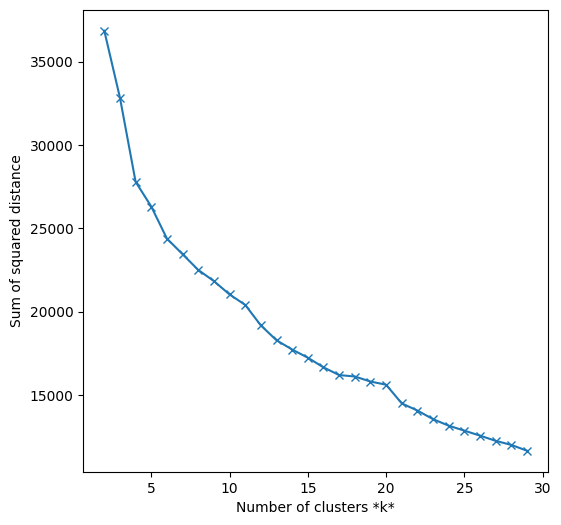

In [101]:
sse = []
list_k = list(range(2, 30))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker="x")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
#plt.ylim(0,)

In [102]:
kmeans = KMeans(n_clusters=5,random_state=7)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(maps,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
        
for i in range(len(groups)):
    print(len(groups[i]))

23
34
34
20
19


In [103]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 50 images to be shown at a time
    if len(files) > 50:
        print(f"Clipping cluster size from {len(files)} to 50")
        files = files[:49]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

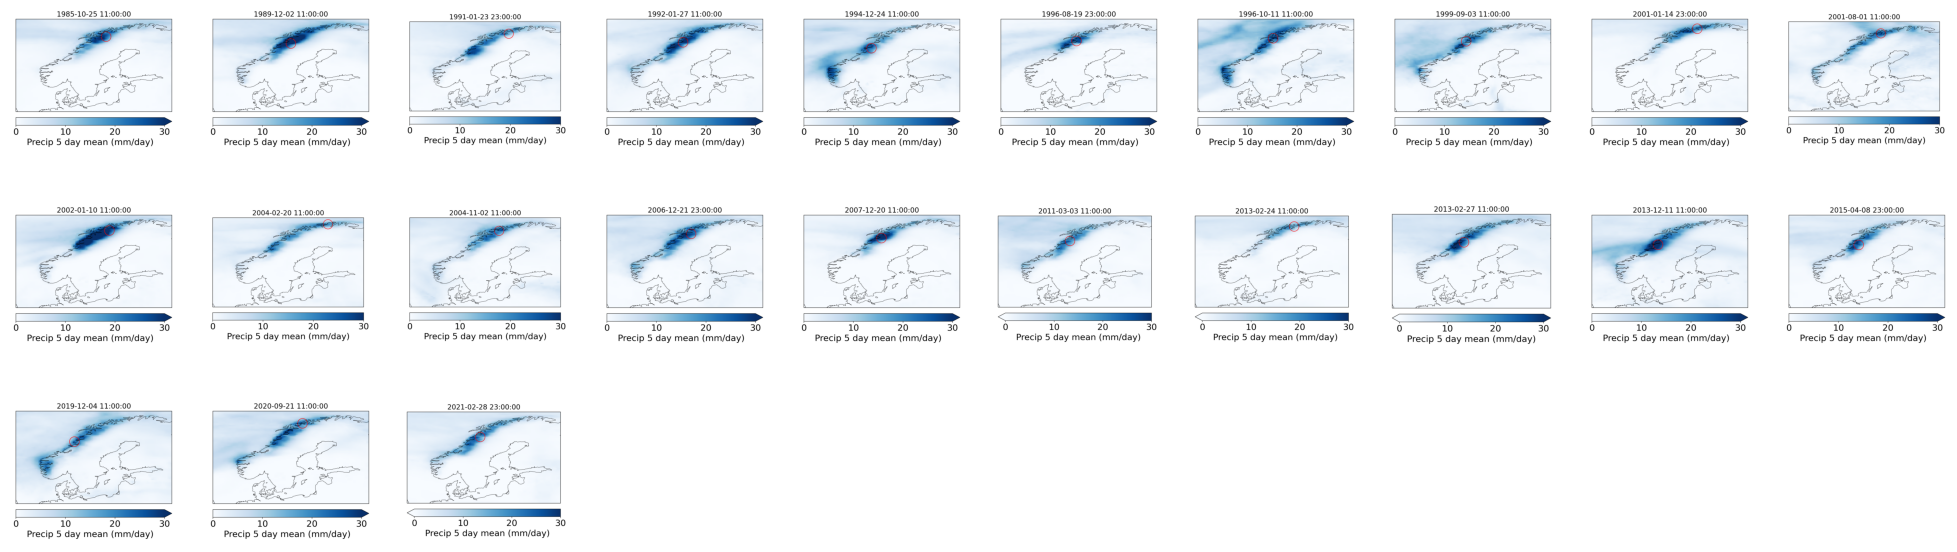

In [104]:
view_cluster(0)

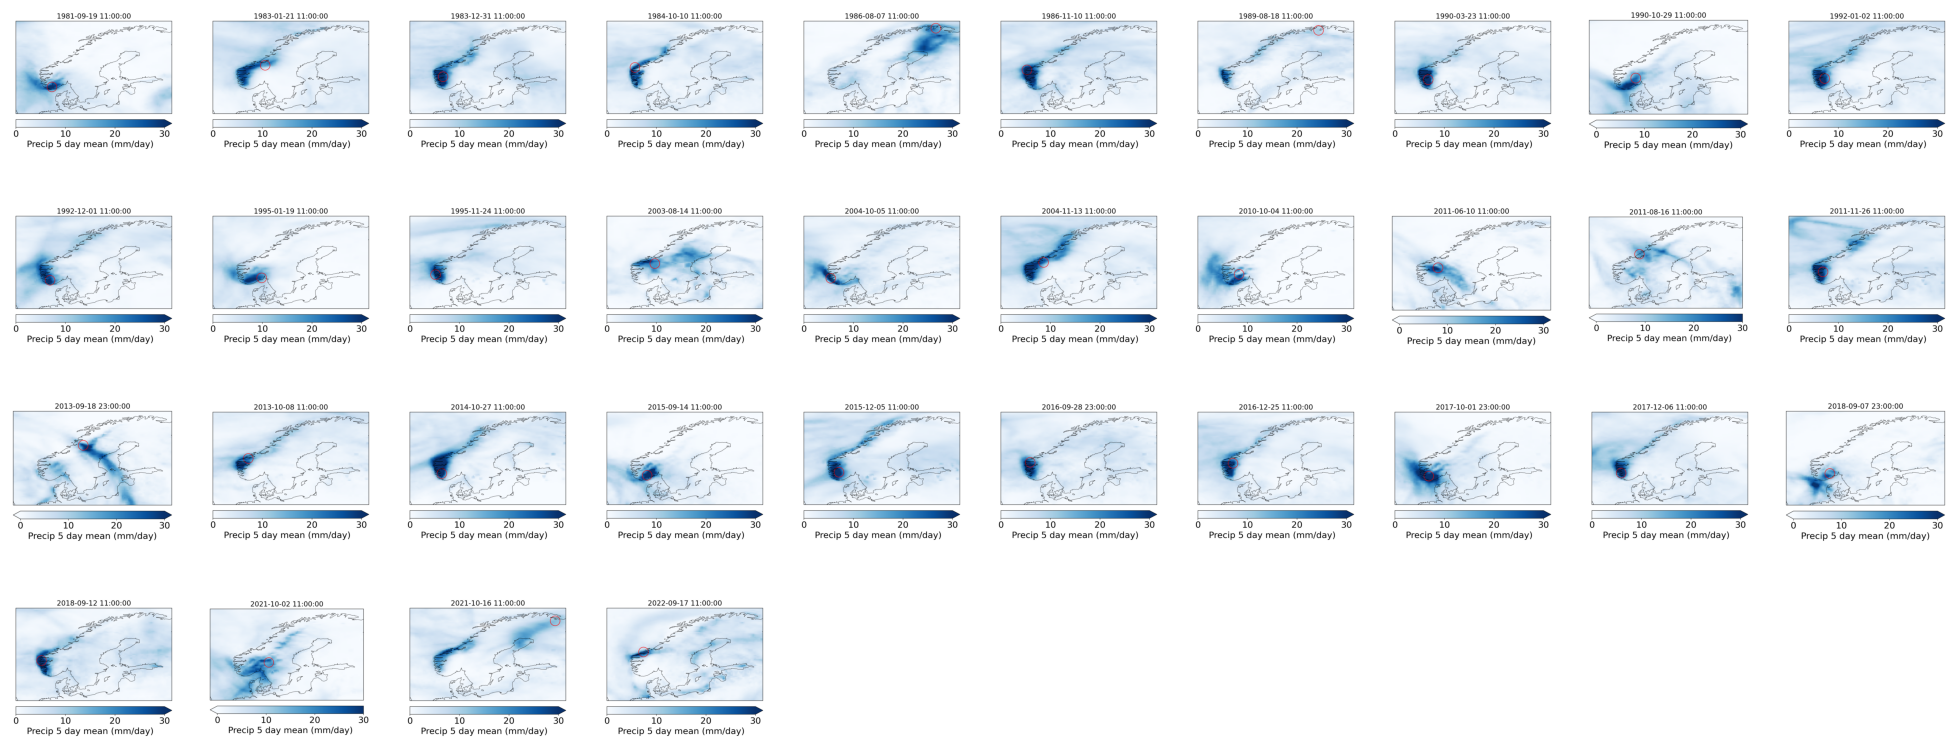

In [105]:
view_cluster(1)

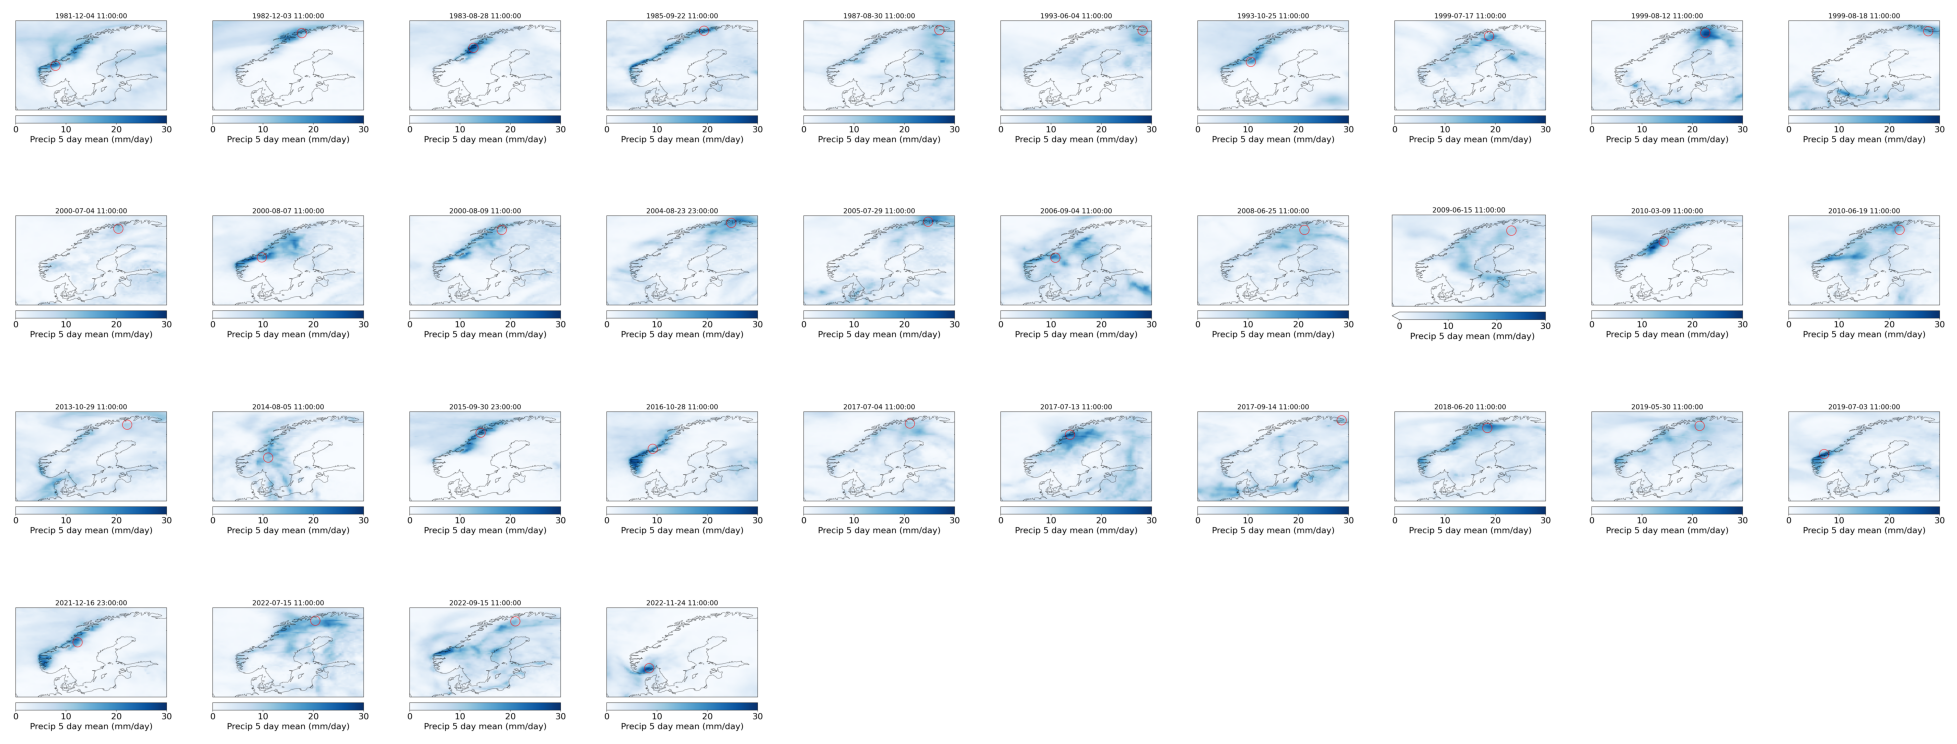

In [106]:
view_cluster(2)

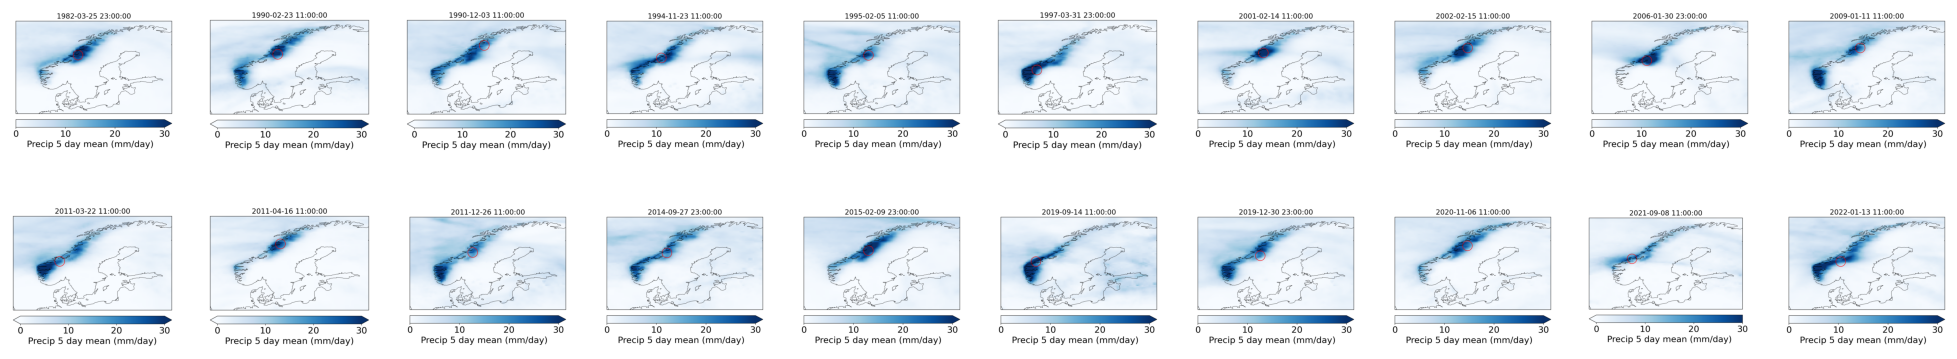

In [107]:
view_cluster(3)

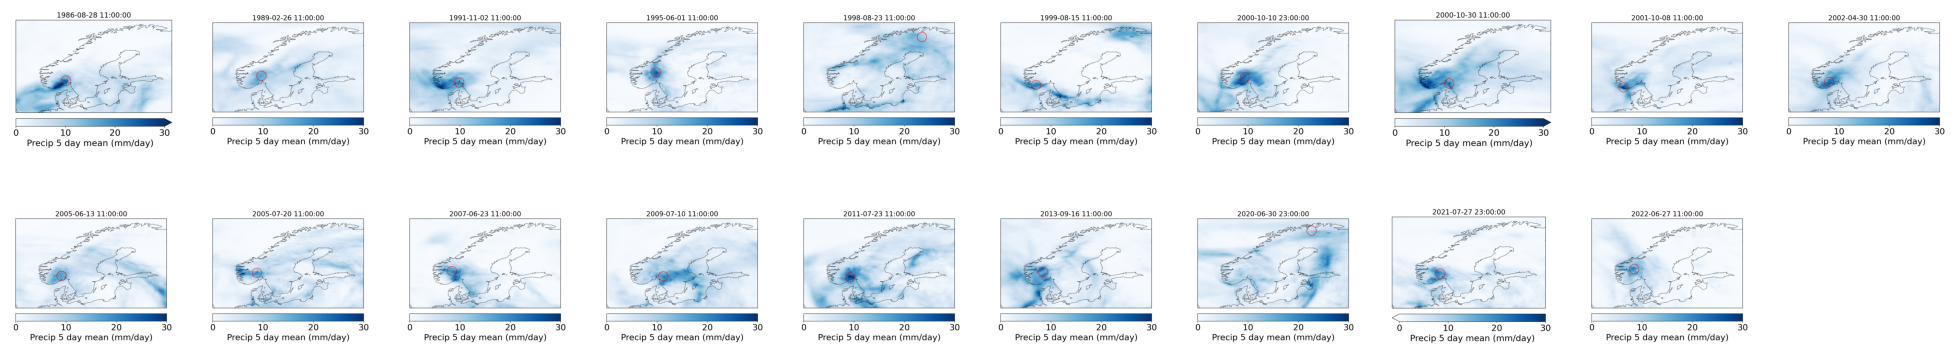

In [108]:
view_cluster(4)

## Make dataframe of groups

In [109]:
def convert_pandas_time(dataframe):
    dataframe['pd_time'] = pd.to_datetime(dataframe['date'], format='%Y-%m-%d',errors='coerce')

In [110]:
all_events_list = []

for i in range(len(groups)):
    group_temp_table = pd.DataFrame(groups[i],columns=['filename'])
    group_temp_table['date'] = group_temp_table.filename.str.split('_').str[3]
    group_temp_table['lat'] = group_temp_table.filename.str.split('_').str[4].astype(float)
    group_temp_table['lon'] = group_temp_table.filename.str.split('_').str[5].str.rstrip('.png').astype(float)
    group_temp_table['sigma'] = group_temp_table.filename.str.split('_').str[1]
    group_temp_table['ens_member'] = group_temp_table.filename.str.split('_').str[2]
    group_temp_table['type'] = group_temp_table.filename.str.split('_').str[0]
    group_temp_table['group'] = i
    all_events_list.append(group_temp_table)

In [111]:
all_events = pd.concat(all_events_list,ignore_index=True)

convert_pandas_time(all_events)

In [112]:
all_events['month'] = all_events['pd_time'].dt.month
all_events['year'] = all_events['pd_time'].dt.year

In [113]:
all_events

,filename,date,lat,lon,sigma,ens_member,type,group,pd_time,month,year
0,precip_3_ERA5_1985-10-25_68.42_18.5.png,1985-10-25,68.42,18.50,3,ERA5,precip,0,1985-10-25,10,1985
1,precip_3_ERA5_1989-12-02_67.0_16.0.png,1989-12-02,67.00,16.00,3,ERA5,precip,0,1989-12-02,12,1989
2,precip_3_ERA5_1991-01-23_69.46_20.98.png,1991-01-23,69.46,20.98,3,ERA5,precip,0,1991-01-23,1,1991
3,precip_3_ERA5_1992-01-27_67.25_15.62.png,1992-01-27,67.25,15.62,3,ERA5,precip,0,1992-01-27,1,1992
4,precip_3_ERA5_1994-12-24_66.05_13.85.png,1994-12-24,66.05,13.85,3,ERA5,precip,0,1994-12-24,12,1994
...,...,...,...,...,...,...,...,...,...,...,...
125,precip_3_ERA5_2011-07-23_59.55_9.86.png,2011-07-23,59.55,9.86,3,ERA5,precip,4,2011-07-23,7,2011
126,precip_3_ERA5_2013-09-16_60.69_9.0.png,2013-09-16,60.69,9.00,3,ERA5,precip,4,2013-09-16,9,2013
127,precip_3_ERA5_2020-06-30_69.47_24.12.png,2020-06-30,69.47,24.12,3,ERA5,precip,4,2020-06-30,6,2020
128,precip_3_ERA5_2021-07-27_60.21_10.04.png,2021-07-27,60.21,10.04,3,ERA5,precip,4,2021-07-27,7,2021


In [114]:
import cartopy.crs as ccrs
import cartopy.feature as cf

Text(0.5, 0.75, 'Locations of grouped ERA5 precip 3 sigma extremes')

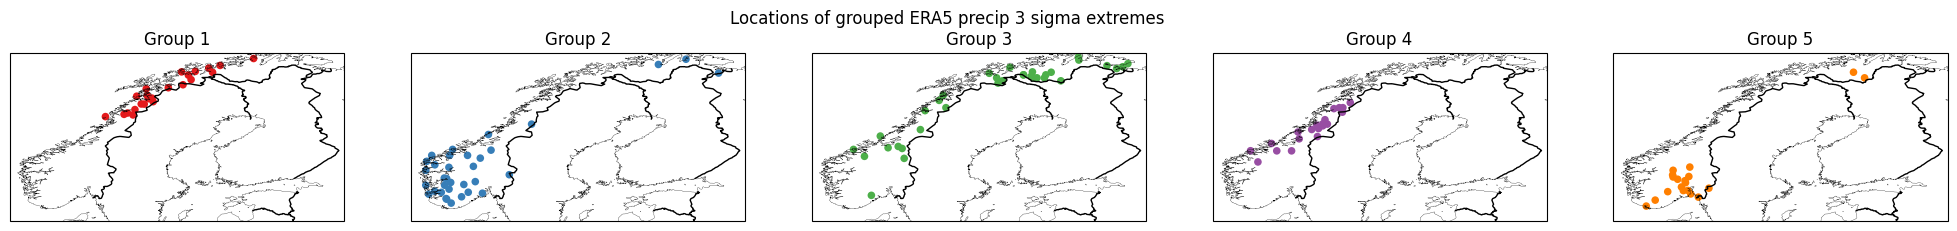

In [115]:
fig, axs = plt.subplots(nrows=1,ncols=len(groups),
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(25,5)
                       )

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for n,group in enumerate(groups):
    select_group = all_events[all_events["group"] == n]

    axs[n].scatter(select_group['lon'],select_group['lat'],marker='o',s = 30,alpha=1,edgecolors='none',
            transform = ccrs.PlateCarree(),
            c = select_group['group'],cmap='Set1',vmax=8,vmin=0)
    
    axs[n].coastlines(linewidth=0.2)  # cartopy function
    axs[n].add_feature(cf.BORDERS)
    axs[n].set_extent([4,32,57,71,])
    axs[n].set_title(f'Group {n+1}')

#cbar_ax = fig.add_axes([0.2, 0.47, 0.6, 0.015])
#cbar=fig.colorbar(fg,cax=cbar_ax,orientation='horizontal',label='Precip (mm/day)')
plt.suptitle(f'Locations of grouped {exp_label} extremes',y=0.75)
#fig.subplots_adjust(bottom=0.5, top=0.9, left=0.1, right=0.9,wspace=0.02, hspace=0.17)

In [116]:
month_labs = ['J','F','M','A','M','J','J','A','S','O','N','D']

Text(0.5, 0.95, 'Months of grouped ERA5 precip 3 sigma extremes')

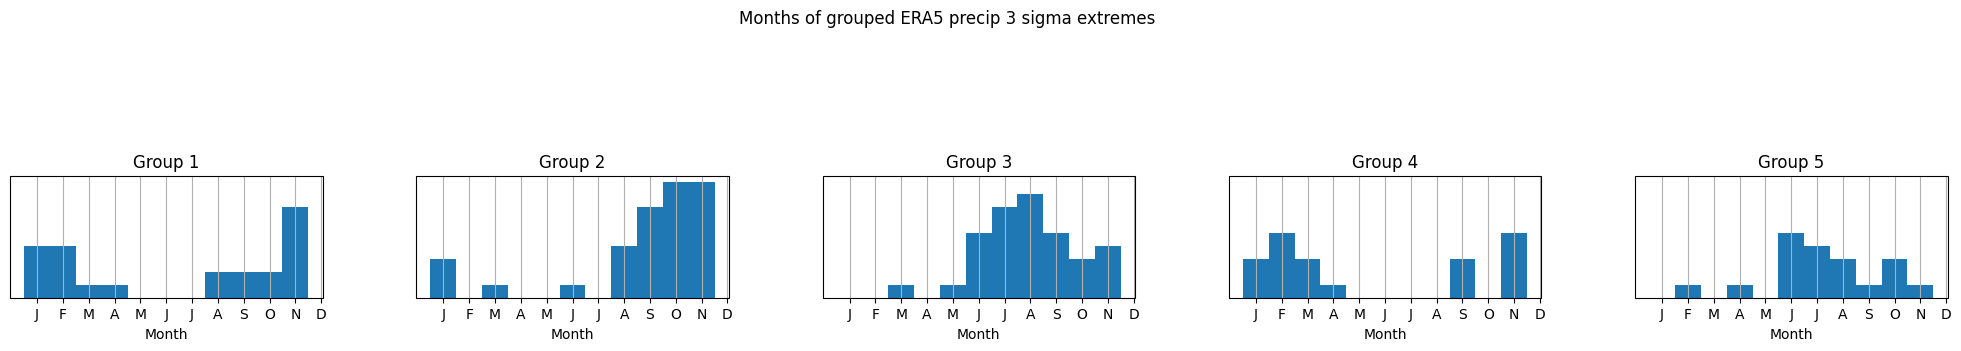

In [120]:
fig, axs = plt.subplots(nrows=1,ncols=len(groups),
                        subplot_kw={'projection': ccrs.PlateCarree()},sharey='row',
                        figsize=(25,5)
                       )

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for n,group in enumerate(groups):
    select_group = all_events[all_events["group"] == n]
    bins = np.linspace(1, 12, 12)

    select_group.hist(column=['month'],bins=bins,ax=axs[n],range=[1,12])
    axs[n].set_xlabel('Month')
    axs[n].set_ylabel('Frequency')
    axs[n].set_title(f'Group {n+1}')
    axs[n].set_xticks(np.arange(1.5,13))
    axs[n].set_xticklabels(month_labs)
    axs[n].set_aspect(0.5)

#cbar_ax = fig.add_axes([0.2, 0.47, 0.6, 0.015])
#cbar=fig.colorbar(fg,cax=cbar_ax,orientation='horizontal',label='Precip (mm/day)')
plt.suptitle(f'Months of grouped {exp_label} extremes',y=0.95)
#fig.subplots_adjust(bottom=0.5, top=0.9, left=0.1, right=0.9,wspace=0.02, hspace=0.17)

Text(0.5, 0.97, 'Year of grouped ERA5 precip 3 sigma extremes')

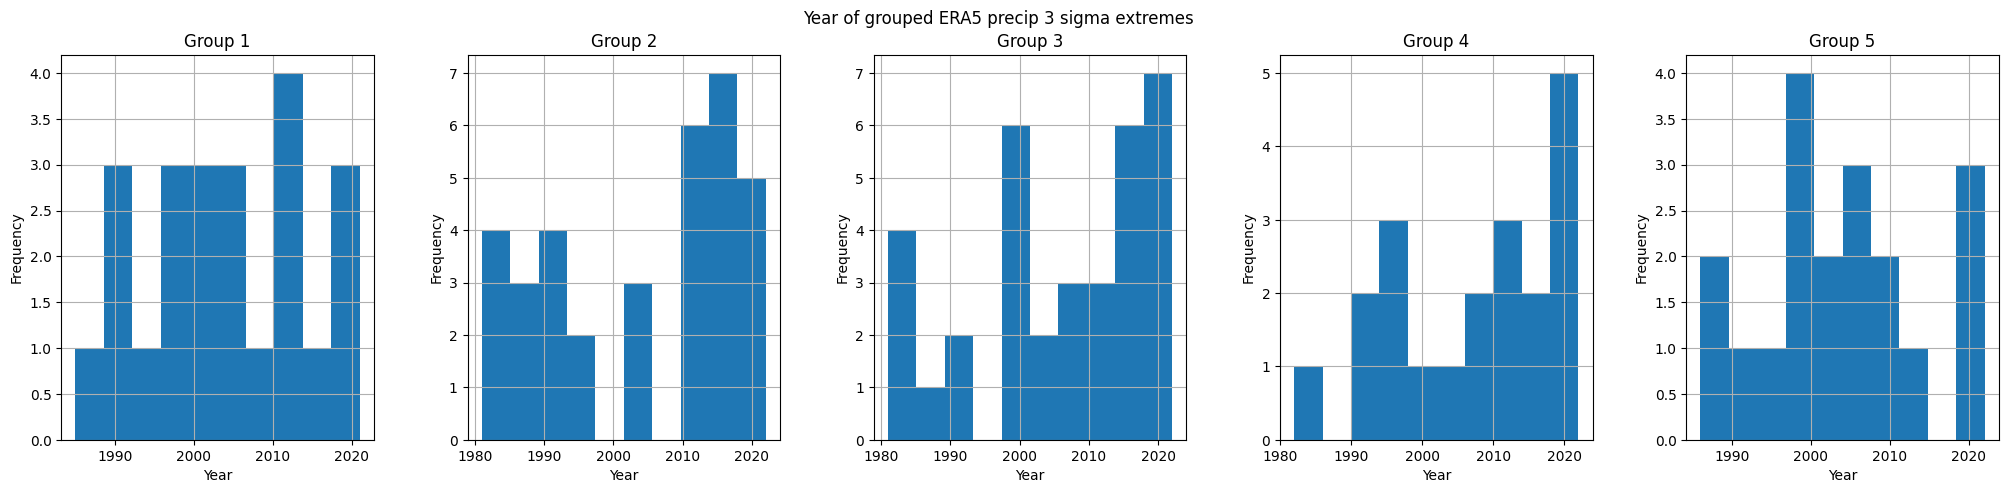

In [118]:
fig, axs = plt.subplots(nrows=1,ncols=len(groups),
                        #subplot_kw={'projection': ccrs.PlateCarree()},sharey='row',
                        figsize=(25,5)
                       )

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the models
for n,group in enumerate(groups):
    select_group = all_events[all_events["group"] == n]
    #bins = np.linspace(1, 12, 12)

    select_group.hist(column=['year'],ax=axs[n])
    axs[n].set_xlabel('Year')
    axs[n].set_ylabel('Frequency')
    axs[n].set_title(f'Group {n+1}')
    #axs[n].set_xticks(np.arange(1.5,13))
    #axs[n].set_xticklabels(month_labs)

#cbar_ax = fig.add_axes([0.2, 0.47, 0.6, 0.015])
#cbar=fig.colorbar(fg,cax=cbar_ax,orientation='horizontal',label='Precip (mm/day)')
plt.suptitle(f'Year of grouped {exp_label} extremes',y=0.97)
#fig.subplots_adjust(bottom=0.5, top=0.9, left=0.1, right=0.9,wspace=0.02, hspace=0.17)